In [ ]:
# This is to explore Hypothesis 1 Overall Ratings

In [ ]:
# Notes this is a list of the main hypothesis along with options to explore 
# that the group has initially come up with

# Certain aspects of listing influence overall rating. What are they? - Jennifer
    # Choose 3-4 factors, plot each against overall rating, see what most closely correlates
    # Number of listings per host - any correlation to ratings?  Do ratings go down the more listings same host has?
    # Price as relates to rating
    # Cleaning fee as relates to rating, % of total rate
    # What is the average rating?
    # Listed features
    # Availability 90-60 days

In [77]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# this is to grab the data that we created on 01/03/2023 as a group

df = pd.read_csv('all_listings_df')
df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,...,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,...,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,...,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver


In [9]:
# just looking at the different types of data that was included in the file
df.dtypes

id                                  int64
last_scraped                       object
description                        object
neighborhood_overview              object
host_id                             int64
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_listings_count                 int64
host_total_listings_count           int64
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bathrooms_text                     object
bedrooms                          

In [24]:
# cleaning I think that the availability columns should be percents


df.loc[:, 'avail_30_percent'] = df['availability_30'] / 30 
df.loc[:, 'avail_60_percent'] = df['availability_60'] / 60 
df.loc[:, 'avail_90_percent'] = df['availability_90'] / 90 
df.loc[:, 'avail_365_percent'] = df['availability_365'] / 365 


df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,avail_30_percent,avail_60_percent,avail_90_percent,avail_365_percent,avail_60_percent
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,...,4.91,f,2,2.87,Denver,0.133333,0.450000,0.633333,0.402740,0.450000
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,...,4.71,f,1,0.50,Denver,0.766667,0.883333,0.922222,0.980822,0.883333
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.85,f,2,4.04,Denver,0.166667,0.450000,0.588889,0.638356,0.450000
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.86,f,2,0.95,Denver,0.000000,0.000000,0.000000,0.432877,0.000000
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,...,4.81,f,2,1.39,Denver,0.000000,0.000000,0.144444,0.789041,0.000000


In [63]:
# converting availability and bookable to int type data 
df['has_availability_recode'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable_recode'] = df['instant_bookable'].map({'t': 1, 'f': 0})

# If you want 1 for True and 2 for False
df['has_availability_recode'] = df['has_availability'].replace({'t': 1, 'f': 2})
df['instant_bookable_recode'] = df['instant_bookable'].replace({'t': 1, 'f': 2})

# Calculate percentage distribution
percentage_availibility = df['has_availability_recode'].value_counts(normalize=True) * 100
percentage_bookable = df['instant_bookable_recode'].value_counts(normalize=True) * 100

# Convert to float
df['has_availability_recode'] = df['has_availability_recode'].astype(float)
df['instant_bookable_recode'] = df['instant_bookable_recode'].astype(float)

print(percentage_availibility, percentage_bookable)



has_availability_recode
1    98.328301
2     1.671699
Name: proportion, dtype: float64 instant_bookable_recode
2    66.334077
1    33.665923
Name: proportion, dtype: float64


In [66]:
# first all variables included for this analysis 

var_int = ["price", "has_availability", "availability_30", "availability_60", 
"availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", 
"number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", 
"review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", 
"review_scores_location", "review_scores_value", "instant_bookable", "calculated_host_listings_count", 
"reviews_per_month", "host_location", "city", "avail_30_percent", "avail_60_percent", 
"avail_90_percent", "avail_365_percent" , "has_availability_recode" , "instant_bookable_recode"]

var_int_df = df[var_int]
var_int_df.head()

# Need to do: 
# 1) make certain that I have all appropriate variables 
# 2) add information to the excel when applicable
# 3) need to add a section to clean the data (and then do #2 again)
# 4) what am I missing?  

,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,...,calculated_host_listings_count,reviews_per_month,host_location,city,avail_30_percent,avail_60_percent,avail_90_percent,avail_365_percent,has_availability_recode,instant_bookable_recode
0,90.0,t,4,27,57,147,179,7,0,4.99,...,2,2.87,"Denver, CO",Denver,0.133333,0.450000,0.633333,0.402740,1.0,2.0
1,179.0,t,23,53,83,358,87,0,0,4.85,...,1,0.50,"Denver, CO",Denver,0.766667,0.883333,0.922222,0.980822,1.0,2.0
2,64.0,t,5,27,53,233,712,43,2,4.85,...,2,4.04,"Denver, CO",Denver,0.166667,0.450000,0.588889,0.638356,1.0,2.0
3,57.0,t,0,0,0,158,168,1,0,4.87,...,2,0.95,"Denver, CO",Denver,0.000000,0.000000,0.000000,0.432877,1.0,2.0
4,33.0,t,0,0,13,288,256,0,0,4.76,...,2,1.39,"Denver, CO",Denver,0.000000,0.000000,0.144444,0.789041,1.0,2.0


In [67]:
var_int_df.dtypes

price                             float64
has_availability                   object
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
number_of_reviews_l30d              int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
instant_bookable                   object
calculated_host_listings_count      int64
reviews_per_month                 float64
host_location                      object
city                               object
avail_30_percent                  float64
avail_60_percent                  float64
avail_90_percent                  

In [68]:
# Looking at the mean, min, max, and number of responses 
numeric_columns = var_int_df.select_dtypes(include=[int, float]).columns
# Iterate I think I am learning to love this one and it took forever to understand it

summary_data = []

for column in numeric_columns:
    mean_value = round(var_int_df[column].mean(), 2)
    lowest_value = round(var_int_df[column].min(), 2)
    highest_value = round(var_int_df[column].max(), 2)
    reported_values = var_int_df[column].count()

    # Append the following data to the summary table that I created 
    summary_data.append({
        'Column': column,
        'Mean': mean_value,
        'Lowest Value': lowest_value,
        'Highest Value': highest_value,
        'Reported Values': reported_values
    })
    
# Creating a dataframe
summary_table = pd.DataFrame(summary_data)

# I think that I am learning to use this rather than export to excel... think
print(summary_table)


                            Column    Mean  Lowest Value  Highest Value  \
0                            price  239.45         17.00       99713.00   
1                  availability_30   11.23          0.00          30.00   
2                  availability_60   28.52          0.00          60.00   
3                  availability_90   49.47          0.00          90.00   
4                 availability_365  205.35          0.00         365.00   
5                number_of_reviews   67.62          0.00        1914.00   
6            number_of_reviews_ltm   17.14          0.00        1135.00   
7           number_of_reviews_l30d    1.36          0.00          59.00   
8             review_scores_rating    4.80          0.00           5.00   
9           review_scores_accuracy    4.84          0.00           5.00   
10       review_scores_cleanliness    4.81          0.00           5.00   
11           review_scores_checkin    4.88          0.00           5.00   
12     review_scores_comm

<Axes: >

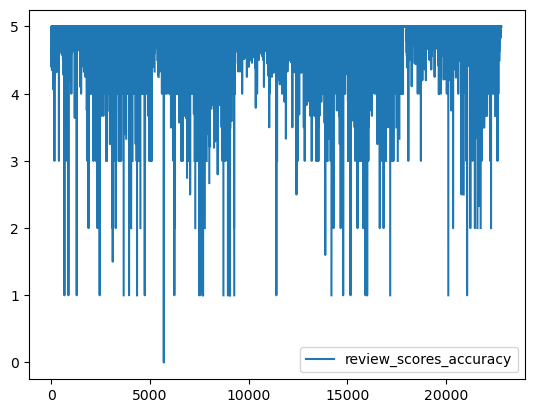

In [35]:
# Choose 3-4 factors, plot each against overall rating, see what most closely correlates
# not numeric "has_availability" "instant_bookable"
# Idea I should bucket these (percent ratings 1 through percent rating 5) etc 

var_int_df[[
# "review_scores_rating", 
# "availability_30", 
# "availability_60", 
# "availability_90", 
# "availability_365", 
# "number_of_reviews" ,
# "number_of_reviews_ltm" ,
# "number_of_reviews_l30d", 
"review_scores_accuracy" 
# "review_scores_cleanliness", 
# "review_scores_checkin", 
# "review_scores_communication", 
# "review_scores_location", 
# "review_scores_value", 
]].plot()

# so basically all of the review scores are highly correlated 

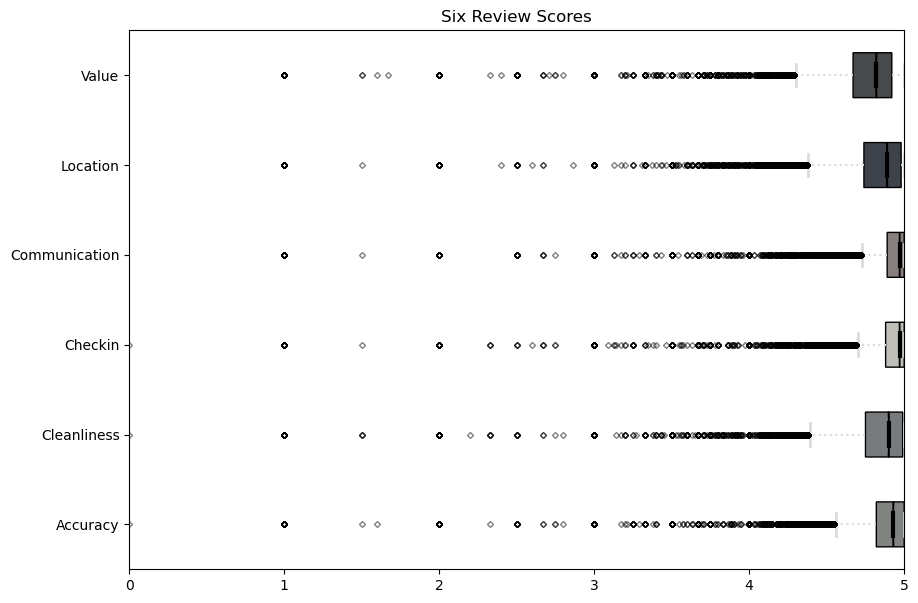

In [52]:
# I founds some cool code from: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
# Creating dataset
# my dataframe is: var_int_df

columns_to_plot = [
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

# drops all values that we don't care about and creates a new group named data
data = [var_int_df[column].dropna().values for column in columns_to_plot] 

fig, ax = plt.subplots(figsize=(10, 7))

bp = ax.boxplot(data, patch_artist=True, notch=True, vert=0)

# Set x-axis limits between 0 and 5
ax.set_xlim(0, 5)

# these are HEX colors you can look up online 
colors = ['#818380', '#777b7e', '#bebdb8', '#877f7d', '#3e424b', '#48494b'] 

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color='#d9dddc', linewidth=1.5, linestyle=':')

for cap in bp['caps']:
    cap.set(color='#d9dddc', linewidth=2)

for median in bp['medians']:
    median.set(color='black', linewidth=3)

for flier in bp['fliers']:
    flier.set(marker='D', color='#d9dddc', alpha=0.5, markersize = 3)

ax.set_yticklabels(["Accuracy", "Cleanliness", "Checkin", "Communication", "Location", "Value"])

plt.title("Six Review Scores")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()



In [70]:
# Making a small df just to look at correlations 

var_cor = ["price", "availability_30", "availability_60", 
"availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", 
"number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", 
"review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", 
"review_scores_location", "review_scores_value", "calculated_host_listings_count", 
"reviews_per_month", "avail_30_percent", "avail_60_percent", 
"avail_90_percent", "avail_365_percent" , "has_availability_recode" , "instant_bookable_recode"]

var_cor_df = df[var_cor]
var_cor_df.head()

,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,...,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,avail_30_percent,avail_60_percent,avail_90_percent,avail_365_percent,has_availability_recode,instant_bookable_recode
0,90.0,4,27,57,147,179,7,0,4.99,4.99,...,5.00,4.91,2,2.87,0.133333,0.450000,0.633333,0.402740,1.0,2.0
1,179.0,23,53,83,358,87,0,0,4.85,4.78,...,4.65,4.71,1,0.50,0.766667,0.883333,0.922222,0.980822,1.0,2.0
2,64.0,5,27,53,233,712,43,2,4.85,4.78,...,4.76,4.85,2,4.04,0.166667,0.450000,0.588889,0.638356,1.0,2.0
3,57.0,0,0,0,158,168,1,0,4.87,4.75,...,4.81,4.86,2,0.95,0.000000,0.000000,0.000000,0.432877,1.0,2.0
4,33.0,0,0,13,288,256,0,0,4.76,4.75,...,4.87,4.81,2,1.39,0.000000,0.000000,0.144444,0.789041,1.0,2.0


In [79]:

# I was thinking it would be good to have the p-values to see what is significant 
# ChatGBT helped with the error that I was getting by including this cleaning code 
# this drops all missing to create a new df that is "clean"
var_cor_df_cleaned = var_cor_df.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate the correlation matrix and p-values
correlation_matrix = var_cor_df_cleaned.corr()
p_values = pd.DataFrame()

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        # Perform Pearson correlation test
        corr, p_value = stats.pearsonr(var_cor_df_cleaned[col1], var_cor_df_cleaned[col2])
        
        # Store p-value in the matrix
        p_values.at[col1, col2] = p_value

# Combine correlation matrix and p-values matrix since they are two seperate sets
correlation_matrix_with_pvalues = pd.concat([correlation_matrix, p_values], keys=['Correlation', 'P-Value'])

# Print the combined matrix
print(correlation_matrix_with_pvalues.round(2))

# I still don't like the way this looks it is large and messy

                                            price  availability_30  \
Correlation price                            1.00             0.02   
            availability_30                  0.02             1.00   
            availability_60                  0.02             0.91   
            availability_90                  0.02             0.82   
            availability_365                 0.00             0.42   
            number_of_reviews               -0.03            -0.07   
            number_of_reviews_ltm           -0.01            -0.03   
            number_of_reviews_l30d          -0.02            -0.03   
            review_scores_rating             0.01            -0.08   
            review_scores_accuracy           0.00            -0.08   
            review_scores_cleanliness        0.00            -0.08   
            review_scores_checkin            0.00            -0.09   
            review_scores_communication      0.00            -0.09   
            review_s

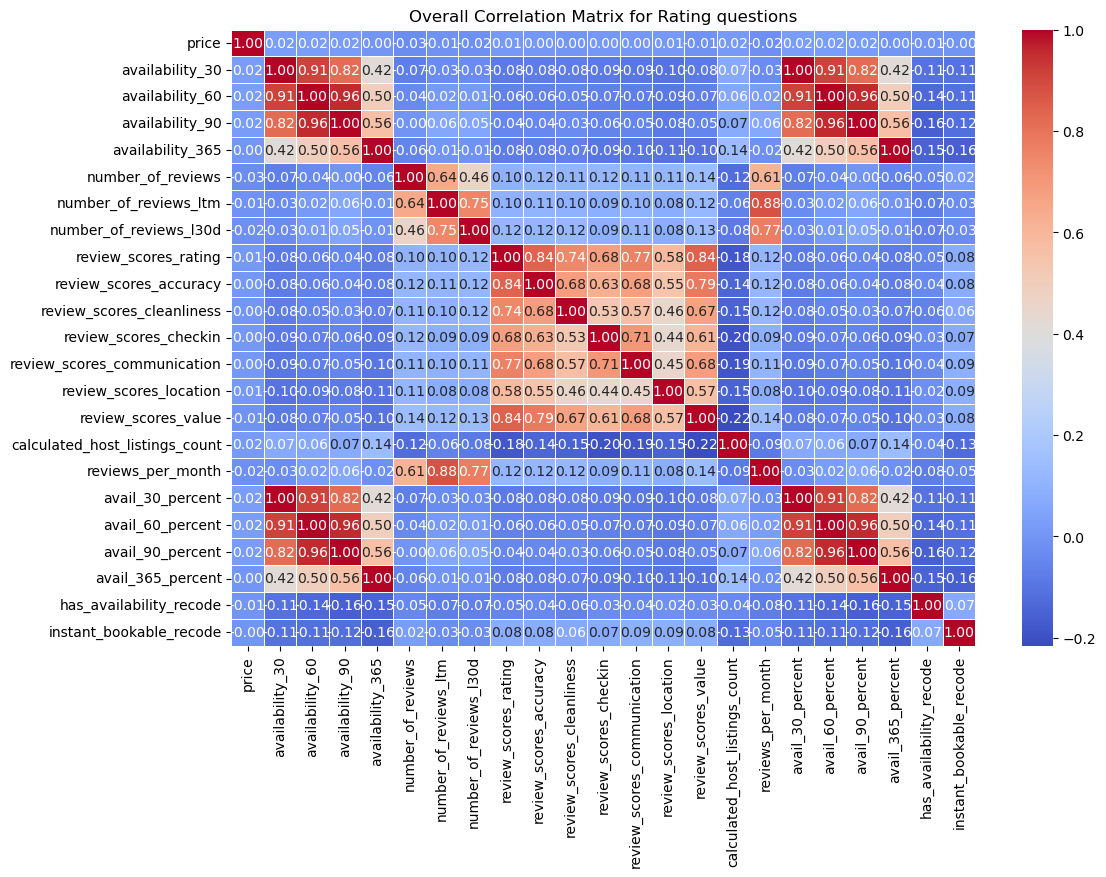

In [88]:
# n0w we are messing with heatmaps 
# this is just printing out the cleaned correlation matrix I build above 
correlation_matrix = var_cor_df_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Overall Correlation Matrix for Rating questions')
plt.show()

# since I have variables that are basically the same there are pockets that
# are reading false poistives I should clean my correlation df (ie availability_30 and avail_30_percent)

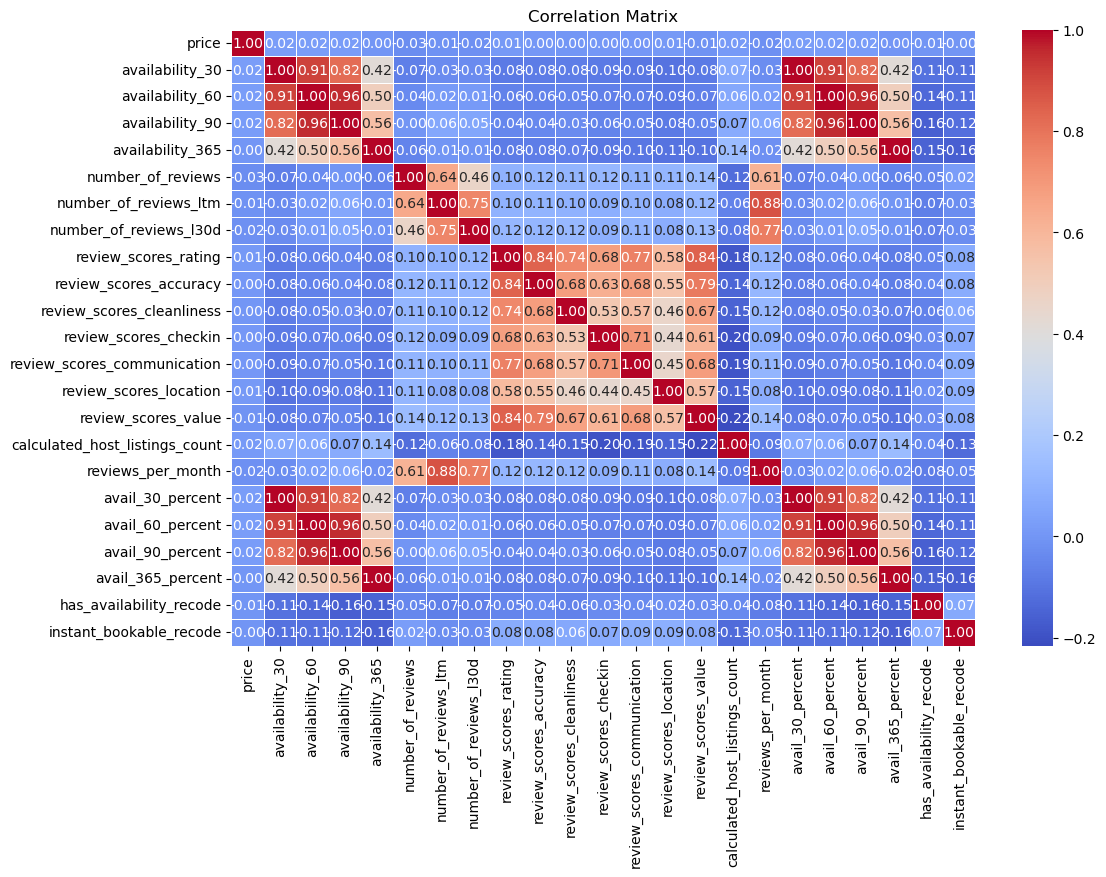

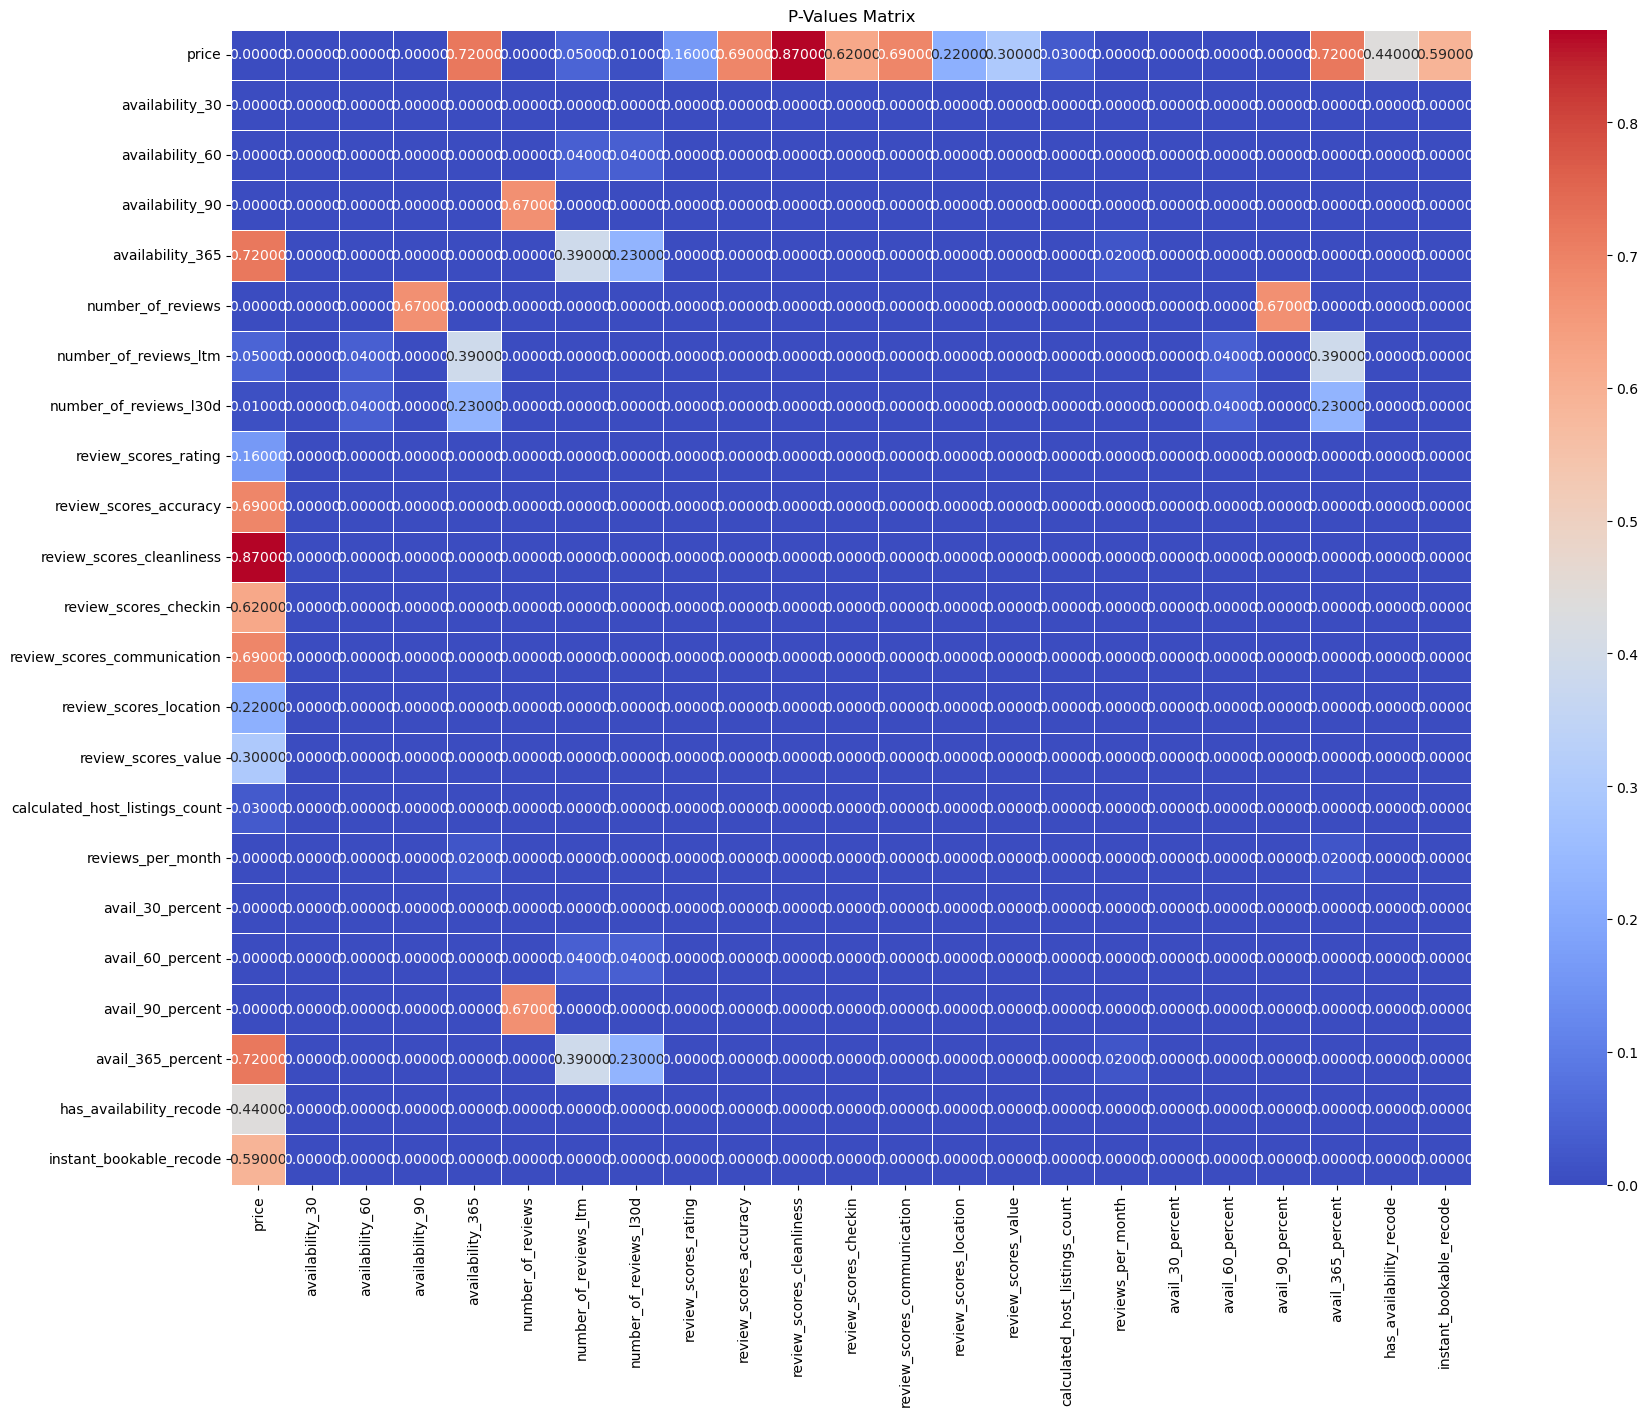

In [98]:
# https://www.statology.org/p-value-correlation-pandas/
# chatgbt helped with the functions because I could not get it to work
# Create a function to calculate correlation matrix with p-values
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 2)
    
    # Convert p-values to numeric, replacing non-numeric values with NaN
    pvalues = round(pvalues.apply(pd.to_numeric, errors='coerce'), 2)
    
    return pvalues

# Assuming var_cor_df_cleaned is your DataFrame
correlation_matrix = var_cor_df_cleaned.corr()
p_values = calculate_pvalues(var_cor_df_cleaned)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

# Display p-values next to the correlation matrix
# things to note: fmt=".5f" - this is saying place 5 decimal places
plt.figure(figsize=(20, 15))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt=".5f", linewidths=.5)
plt.title('P-Values Matrix')

plt.show()